## Pre-processing

In [26]:
import pandas as pd
import re

# 讀取本地的 CSV 檔案
file_path = './Context_Size_and_Tokens_per_Second.csv'  # 修改這裡為你本地的文件路徑
df = pd.read_csv(file_path)

# 提取 token-per-second 的數值
def extract_tokens_per_second(eval_time_line):
    match = re.search(r'(\d+\.\d+) tokens per second', eval_time_line)
    if match:
        return float(match.group(1))
    return None

# 套用該函數來提取每一列的 token-per-second 值
df['Tokens Per Second'] = df['Eval Time Line'].apply(extract_tokens_per_second)

# 建立新 DataFrame 並只保留所需的欄位
df_filtered = df[['Context Size', 'Tokens Per Second']]

# 保存到新的 CSV 文件
df_filtered.to_csv(file_path, index=False)
print(f"File saved to: {file_path}")


File saved to: ./Context_Size_and_Tokens_per_Second.csv


## Plot Context_Size and Latency relation

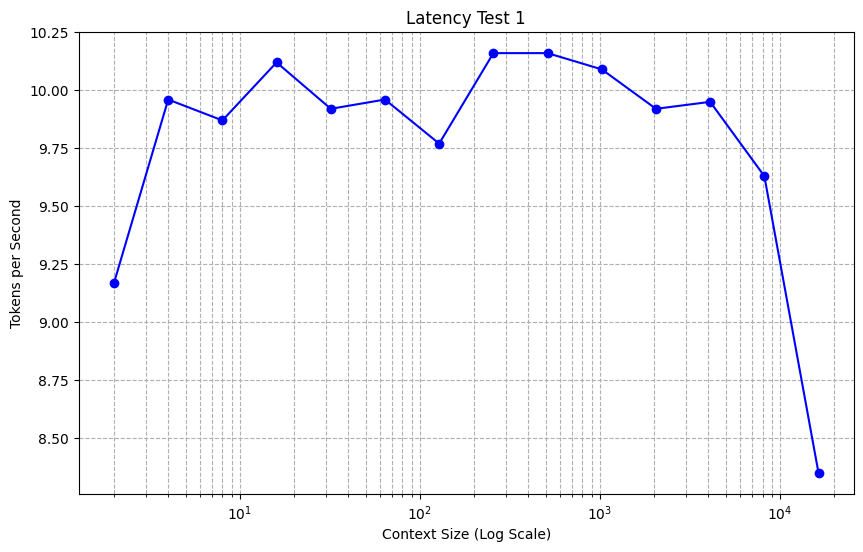

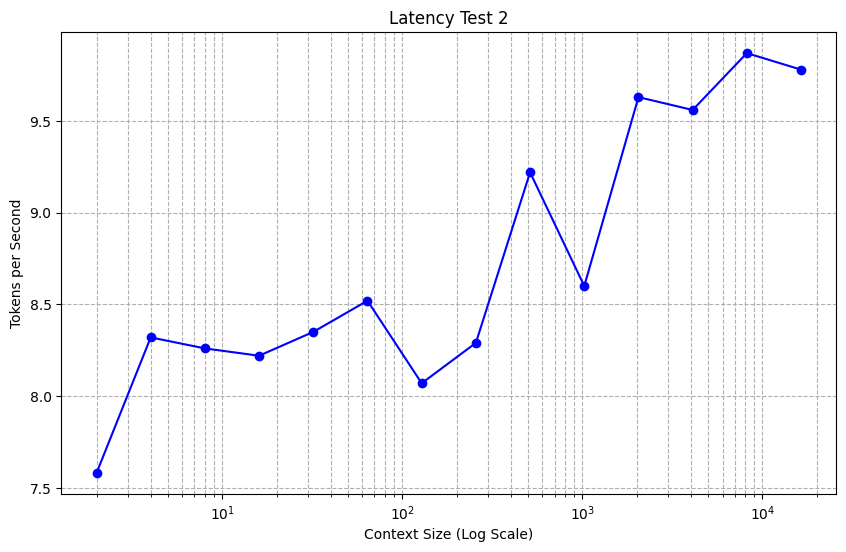

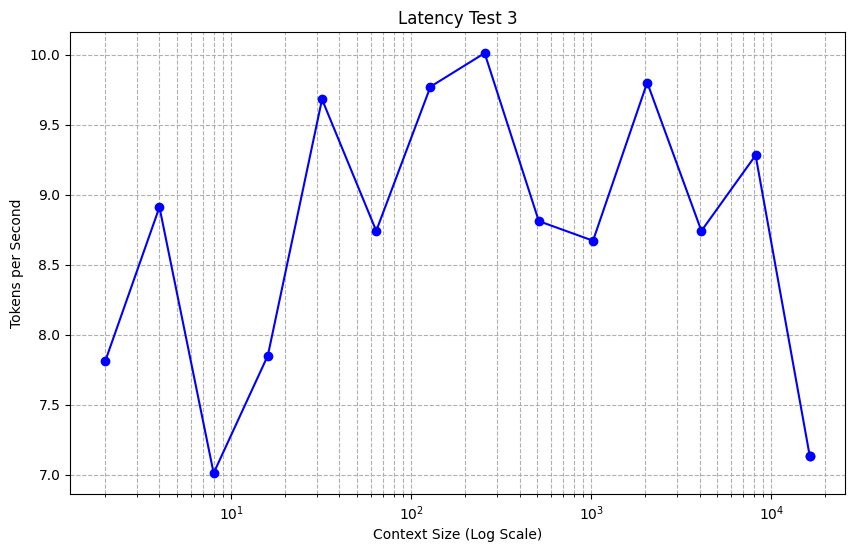

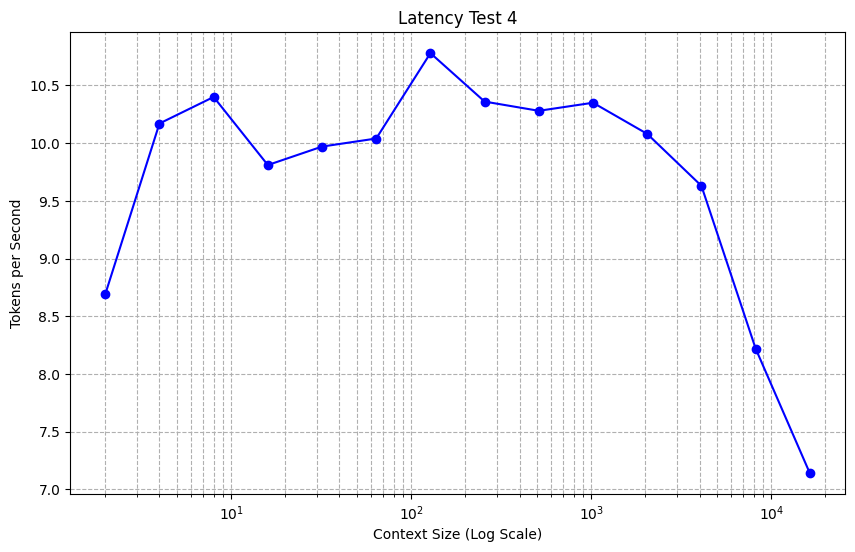

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# 檔案名稱列表
csv_files = [
    'Context_Size_and_Tokens_per_Second_1.csv',
    'Context_Size_and_Tokens_per_Second_2.csv',
    'Context_Size_and_Tokens_per_Second_3.csv',
    'Context_Size_and_Tokens_per_Second_4.csv'
]

# 讀取每個 CSV 並繪製獨立的圖表
for i, csv_file in enumerate(csv_files, 1):
    # 讀取 CSV
    df = pd.read_csv(csv_file)
    
    # 創建一個新圖表
    plt.figure(figsize=(10, 6))
    
    # 繪製圖表，將 Context Size 設為 log 尺度
    plt.plot(df['Context Size'], df['Tokens Per Second'], marker='o', linestyle='-', color='b')
    
    # 設定 X 軸為 log 尺度
    plt.xscale('log')
    
    # 設置圖表標題和標籤
    plt.title(f'Latency Test {i}')
    plt.xlabel('Context Size (Log Scale)')
    plt.ylabel('Tokens per Second')
    
    # 顯示網格
    plt.grid(True, which="both", ls="--")
    
    # 顯示圖表
    plt.show()


## 平均畫圖

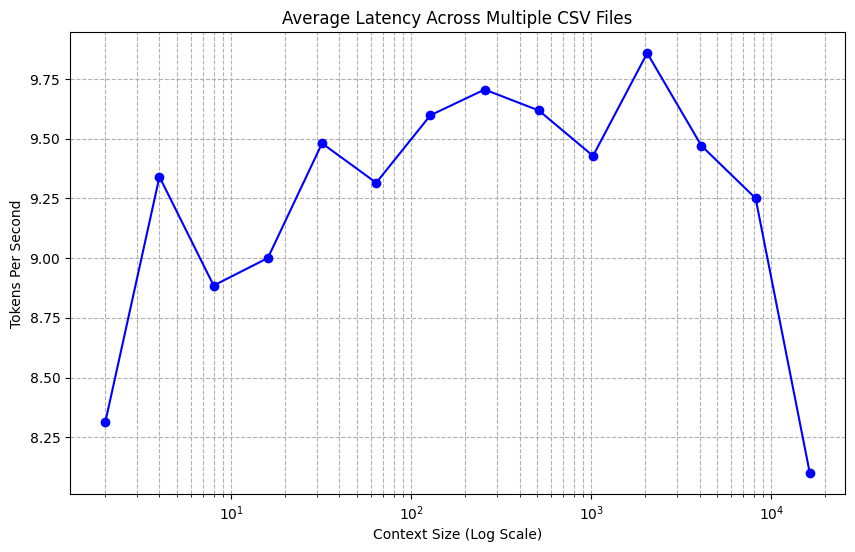

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 檔案名稱列表
csv_files = [
    'Context_Size_and_Tokens_per_Second_1.csv',
    'Context_Size_and_Tokens_per_Second_2.csv',
    'Context_Size_and_Tokens_per_Second_3.csv',
    'Context_Size_and_Tokens_per_Second_4.csv',
]

# 創建一個空的 DataFrame 來存放所有檔案的數據
all_data = pd.DataFrame()

# 讀取每個 CSV 檔案，將數據合併到 all_data 中
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    # 如果還沒有數據，直接賦值
    if all_data.empty:
        all_data = df
    else:
        # 將 'Tokens per Second' 欄位相加，Context Size 應該是一樣的，不用相加
        all_data['Tokens Per Second'] += df['Tokens Per Second']

# 計算平均值
all_data['Tokens Per Second'] /= len(csv_files)

# 繪製平均值圖表，將 Context Size 設為 log 尺度
plt.figure(figsize=(10, 6))
plt.plot(all_data['Context Size'], all_data['Tokens Per Second'], marker='o', linestyle='-', color='b')

# 設定 X 軸為 log 尺度
plt.xscale('log')

# 設置圖表標題和標籤
plt.title('Average Latency Across Multiple CSV Files')
plt.xlabel('Context Size (Log Scale)')
plt.ylabel('Tokens Per Second')

# 顯示網格
plt.grid(True, which="both", ls="--")

# 顯示圖表
plt.show()
